<h6>Objective</h6>
    <p>Your task is to develop an AI-based predictive maintenance algorithm using the
provided dataset, which contains temperature and vibration sensor readings from
dishwashing machines under different health conditions (good, moderate, and
bad). Your algorithm should accurately predict when a dishwashing machine will
require maintenance.</p>

<h6>Dataset Description</h6>
    <p>The dataset provided for this assignment includes temperature and vibration sensor readings from various dishwashing machines. Each entry in the dataset is labeled with the machine's current health status:</p>

   <p>Good Health: The machine is operating optimally without any need for immediate maintenance.</p>
    <p>Moderate Health: The machine is operating below optimal conditions and may
require maintenance soon.</p>
<p>Bad Health: The machine requires immediate maintenance.</p>

Tasks:
Data Analysis and Preprocessing:
Analyze the provided dataset to understand the characteristics and distribution of
the data.
Preprocess the data as necessary, including handling missing values.

## <b id='1'>1 <span style='color:#ffa64d'>|</span> Importing The Dependencies.</b> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## <b id='1'>2 <span style='color:#ffa64d'>|</span> Take a look at dataset</b> 

In [2]:
df = pd.read_excel('Pallet Washing Machine.xlsx')
df.head()

,device,time,Temperature Sensor-1,Vibration Sensor-1,Vibration Sensor-2,Vibration Sensor-3
0,esp32_001,2022-11-08T09:34:57.8310000Z,20.797449,2147483647,4758,2147483647
1,esp32_001,2022-11-08T09:35:03.3310000Z,21.683039,7056,4590,2147483647
2,esp32_001,2022-11-08T09:35:08.6130000Z,21.838221,4465,6405,2147483647
3,esp32_001,2022-11-08T09:35:14.1130000Z,21.855524,3699,935,2147483647
4,esp32_001,2022-11-08T09:35:19.3800000Z,21.700251,2269,266,447


In [3]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 device                  0
time                    0
Temperature Sensor-1    0
Vibration Sensor-1      0
Vibration Sensor-2      0
Vibration Sensor-3      0
dtype: int64


In [4]:
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        Temperature Sensor-1  Vibration Sensor-1  Vibration Sensor-2  \
count           7600.000000        7.600000e+03        7.600000e+03   
mean              37.338332        8.501951e+05        1.415110e+06   
std               27.058924        4.266051e+07        5.506724e+07   
min                1.588312        9.400000e+01        3.100000e+01   
25%               26.450861        4.940000e+02        3.610000e+02   
50%               34.867775        1.145500e+03        8.695000e+02   
75%               41.796074        4.593250e+03        4.454000e+03   
max              276.644318        2.147484e+09        2.147484e+09   

       Vibration Sensor-3  
count        7.600000e+03  
mean         2.687197e+08  
std          7.105798e+08  
min          3.100000e+01  
25%          3.807500e+02  
50%          6.325000e+02  
75%          4.690000e+03  
max          2.147484e+09  


## <b id='1'>3 <span style='color:#ffa64d'>|</span>Data Visualization</b> 

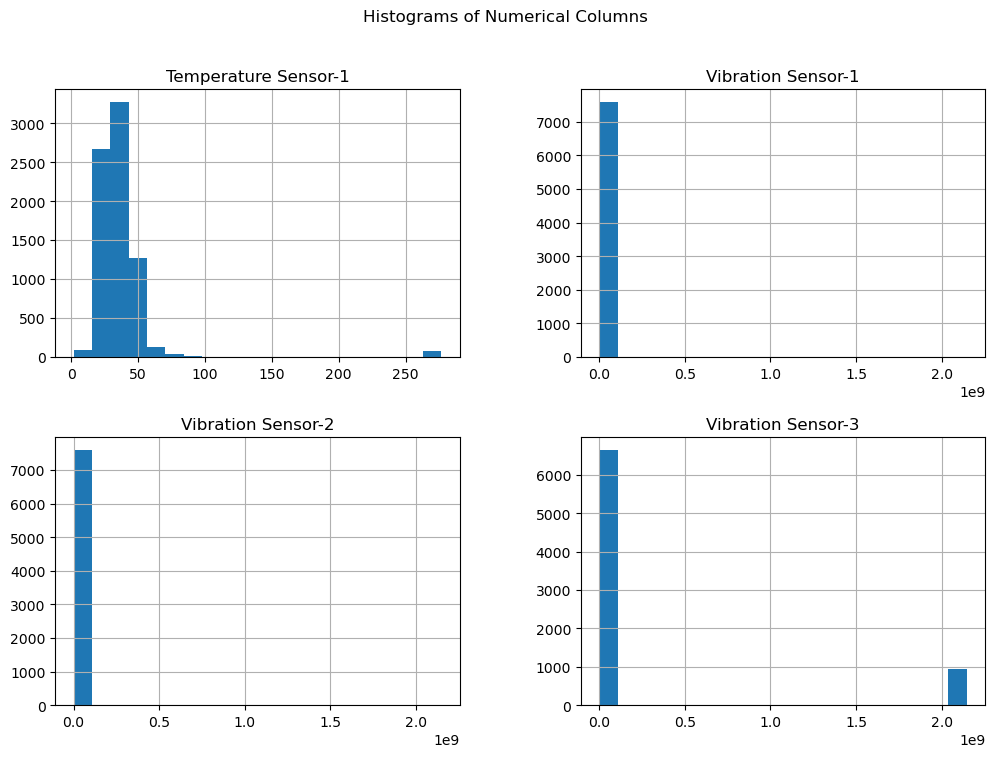

In [5]:
df.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

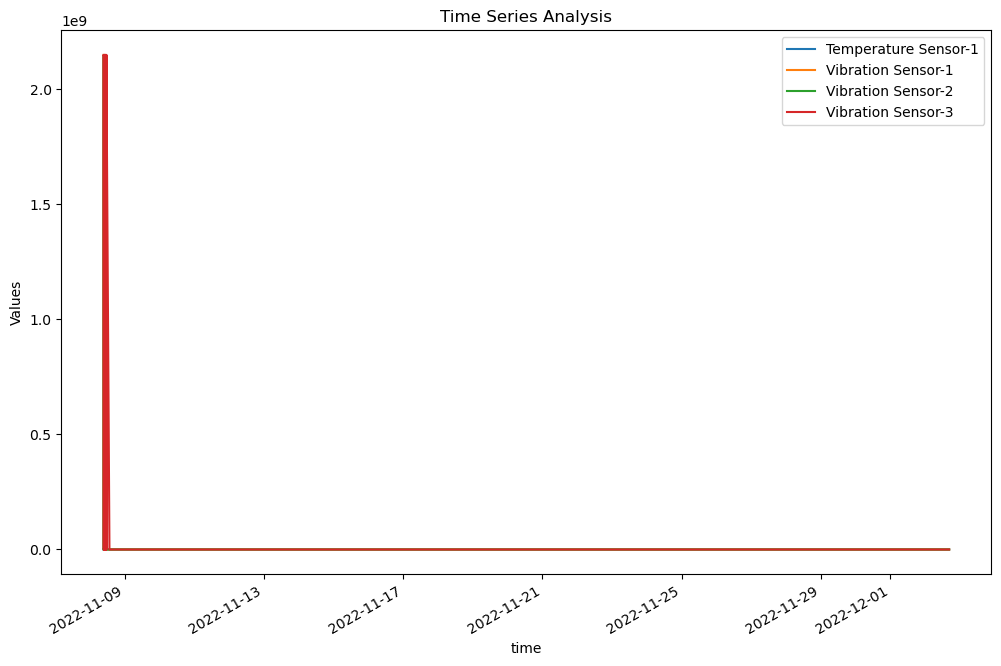

In [6]:
df['time'] = pd.to_datetime(df['time'])

df.set_index('time', inplace=True)
df[['Temperature Sensor-1', 'Vibration Sensor-1', 'Vibration Sensor-2', 'Vibration Sensor-3']].plot(figsize=(12, 8))
plt.title("Time Series Analysis")
plt.ylabel("Values")
plt.show()

In [7]:
cor_data = df[["Temperature Sensor-1","Vibration Sensor-1", "Vibration Sensor-2", "Vibration Sensor-3"]]

Correlation Matrix:
                       Temperature Sensor-1  Vibration Sensor-1  \
Temperature Sensor-1              1.000000           -0.008564   
Vibration Sensor-1               -0.008564            1.000000   
Vibration Sensor-2               -0.014011           -0.000508   
Vibration Sensor-3               -0.164297            0.052550   

                      Vibration Sensor-2  Vibration Sensor-3  
Temperature Sensor-1           -0.014011           -0.164297  
Vibration Sensor-1             -0.000508            0.052550  
Vibration Sensor-2              1.000000            0.067857  
Vibration Sensor-3              0.067857            1.000000  


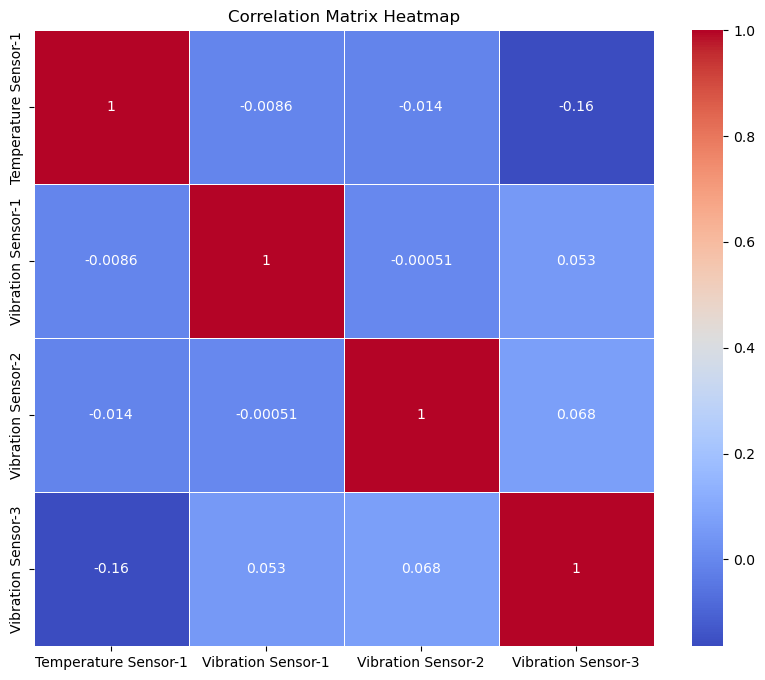

In [8]:
correlation_matrix = cor_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## <b id='1'>4 <span style='color:#ffa64d'>|</span> Data preprocessing</b> 

In [9]:
temperature_percentiles = df['Temperature Sensor-1'].quantile([0.33, 0.67])
df['label'] = pd.cut(df['Temperature Sensor-1'], bins=[-float('inf'), temperature_percentiles.iloc[0], temperature_percentiles.iloc[1], float('inf')],
                    labels=['good', 'moderate', 'bad'])

features = df[['Temperature Sensor-1', 'Vibration Sensor-1', 'Vibration Sensor-2', 'Vibration Sensor-3']]

X_train, X_test, y_train, y_test = train_test_split(features, df['label'], test_size=0.2, random_state=42)

## <b id='1'>5 <span style='color:#ffa64d'>|</span> Model Training</b> 

In [10]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [11]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [12]:
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

## <b id='1'>6 <span style='color:#ffa64d'>|</span> Performence mesurment</b> 

In [13]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [14]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9993421052631579
Classification Report:
               precision    recall  f1-score   support

         bad       1.00      1.00      1.00       492
        good       1.00      1.00      1.00       533
    moderate       1.00      1.00      1.00       495

    accuracy                           1.00      1520
   macro avg       1.00      1.00      1.00      1520
weighted avg       1.00      1.00      1.00      1520

